# Week13: CNN and RNN

- **Student ID** : 2019112028
- **Name** : 박윤서

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, utils, Sequential, optimizers, losses

### Load and Preprocess the Fashion-MNIST Dataset 

In [12]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [13]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [14]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [15]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [16]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [17]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [18]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

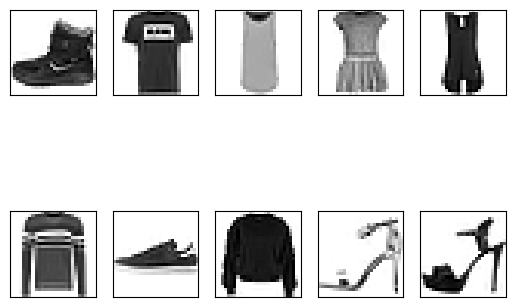

In [19]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model
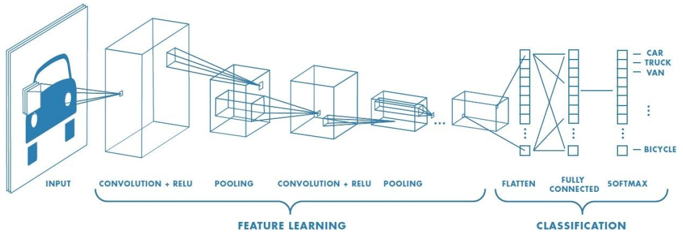

In [21]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    2. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers
base_model = Sequential([
    layers.Conv2D(32, kernel_size=(3,3), padding='same',
                  input_shape=(28, 28, 1), activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Compile the model

In [23]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the model

In [24]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
   1/1875 [..............................] - ETA: 5:03 - loss: 2.3035 - accuracy: 0.0312

2024-11-01 14:05:42.734958: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 28s 15ms/step - loss: 0.3546 - accuracy: 0.8721 - val_loss: 0.2706 - val_accuracy: 0.9008
Epoch 2/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2206 - accuracy: 0.9192 - val_loss: 0.2644 - val_accuracy: 0.9086
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1654 - accuracy: 0.9384 - val_loss: 0.2235 - val_accuracy: 0.9215
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1252 - accuracy: 0.9535 - val_loss: 0.2464 - val_accuracy: 0.9153
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0883 - accuracy: 0.9674 - val_loss: 0.2481 - val_accuracy: 0.9243
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0636 - accuracy: 0.9768 - val_loss: 0.3050 - val_accuracy: 0.9224
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0463 - accuracy: 0.9827 - val_loss: 0.3063 - val_accura

### Plot the loss

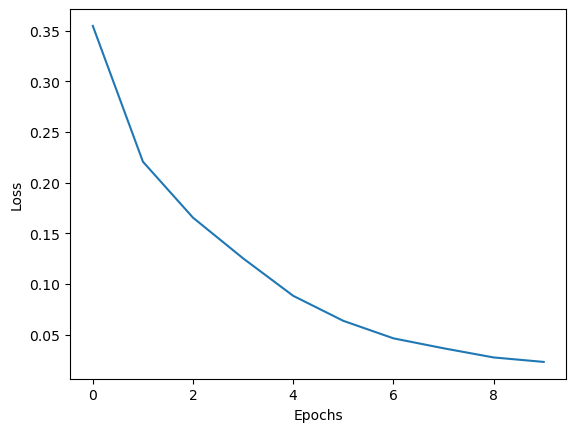

In [25]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [27]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0347 - accuracy: 0.9876
Train accuracy : 0.9876
313/313 [==============================] - 1s 4ms/step - loss: 0.4416 - accuracy: 0.9147
Test accuracy : 0.9147


### The model with dropout regularization
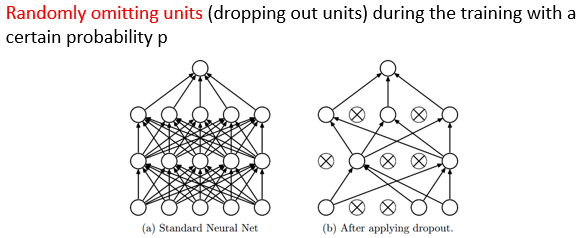

In [28]:
# Base CNN model + dropout with 0.5 before the last layer
dropout_model = Sequential([
    layers.Conv2D(32, kernel_size=(3,3), padding='same', 
                  input_shape=(28, 28, 1), activation='relu'),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Compile the dropout model

In [29]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [30]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4672 - accuracy: 0.8367 - val_loss: 0.2957 - val_accuracy: 0.8927
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3054 - accuracy: 0.8889 - val_loss: 0.2529 - val_accuracy: 0.9063
Epoch 3/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2530 - accuracy: 0.9072 - val_loss: 0.2338 - val_accuracy: 0.9137
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2200 - accuracy: 0.9191 - val_loss: 0.2233 - val_accuracy: 0.9187
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1940 - accuracy: 0.9278 - val_loss: 0.2278 - val_accuracy: 0.9188
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1708 - accuracy: 0.9366 - val_loss: 0.2302 - val_accuracy: 0.9184
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1527 - accuracy: 0.9427 - val_loss: 0.2245 -

### Plot the loss

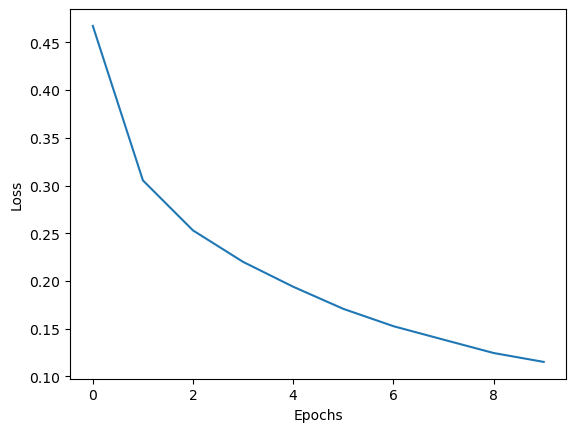

In [31]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [32]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0642 - accuracy: 0.9783
Train accuracy : 0.9783
313/313 [==============================] - 1s 4ms/step - loss: 0.2383 - accuracy: 0.9252
Test accuracy : 0.9252


### Plotting the learning curves

(0.0, 9.0)

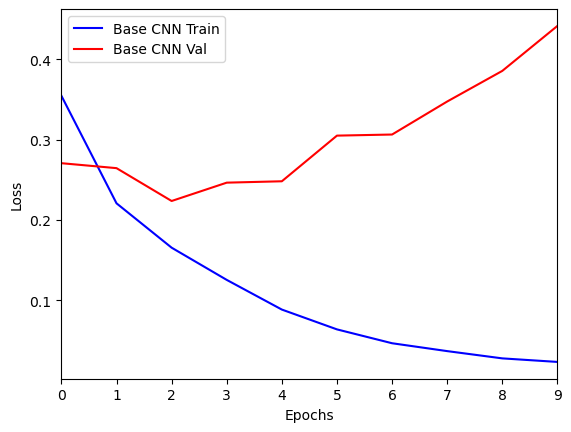

In [33]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

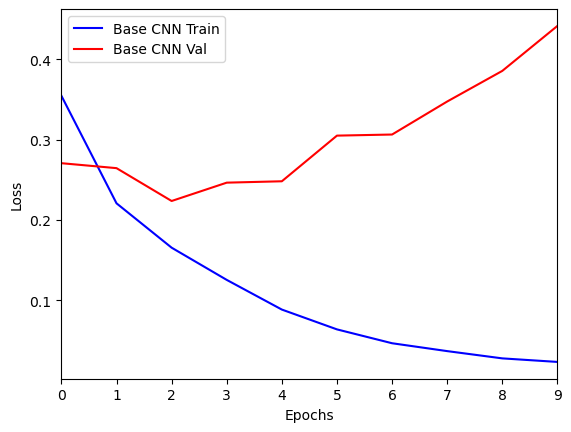

In [34]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

# 2. Recurrent Neural Networks

### Character-level Language Model with RNNs

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

### Load a text to use for training - "The Mysterious Island"

In [53]:
# Reading and processing text '1268-0.txt'
with open('1268-0.txt', 'r') as fp:
    text=fp.read()
    
# use main contents only 
start_indx = text.find('Chapter 1')
end_indx = text.find('End of the Project Gutenberg')
text = text[start_indx:end_indx]

print('Total length:', len(text))

Total length: 1130598


In [54]:
# Check first 500 characters
print(text[:500])

Chapter 1

“Are we rising again?” “No. On the contrary.” “Are we descending?”
 “Worse than that, captain! we are falling!” “For Heaven’s sake heave out
the ballast!” “There! the last sack is empty!” “Does the balloon rise?”
 “No!” “I hear a noise like the dashing of waves. The sea is below the
car! It cannot be more than 500 feet from us!” “Overboard with every
weight! ... everything!”

Such were the loud and startling words which resounded through the air,
above the vast watery desert of the Pa


In [55]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '‘', '’', '“', '”']
Number of unique characters: 85


### Encode the text into integers

In [58]:
# Creating a mapping from characters to indices, and vice versa
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

print(char2idx['A'])
print(idx2char[29])

29
A


In [59]:
# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

# Show encoded text[11:25]
print('Original text :', text[11:25])
print('Encoded text :', encoded_text[11:25])

Original text : “Are we rising
Encoded text : [83 29 72 59  1 77 59  1 72 63 73 63 68 61]


### Create TensorFlow Dataset
- from_tensor_slices() : Creates a Dataset whose elements are slices of the given tensors.
- .as_numpy_iterator() : Returns an iterator which converts all elements of the dataset to numpy.
- .take(*count*) : Creates a `Dataset` with at most *count* elements from this dataset.

In [60]:
# example of TensorFlow dataset
ds = tf.data.Dataset.from_tensor_slices([10, 20, 30])
ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [61]:
# example of TensorFlow dataset
for item in ds:
    print(item)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(30, shape=(), dtype=int32)


2024-11-01 14:54:55.477775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [3]
	 [[{{node Placeholder/_0}}]]


In [62]:
# example of dataset to numpy iterator
for element in ds.as_numpy_iterator():
    print(element)

np.array(list(ds.as_numpy_iterator())).shape

10
20
30


(3,)

In [63]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

# check first 3 elements
for item in ds.take(3):
    print(item.numpy())

31
62
55


2024-11-01 14:55:16.919526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


### Make character sequences from the dataset
- .batch(*count*) : Combines consecutive elements of dataset into batches.
- **sequences** : sequence of fixed size inputs. `tf.data.Dataset` object, shape = (*, 41)


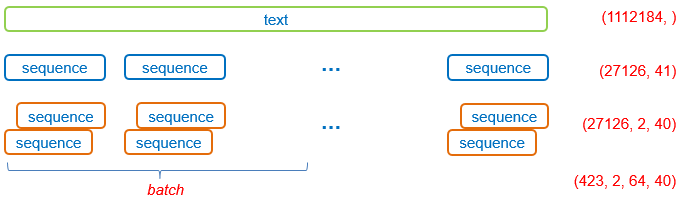

In [64]:
# example of making sequences
seq_length = 3
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7])
ds_sequences = ds.batch(seq_length, drop_remainder=True)

for item in ds_sequences:
    print(item.numpy())

[1 2 3]
[4 5 6]


2024-11-01 14:55:23.487149: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32 and shape [7]
	 [[{{node Placeholder/_0}}]]


In [65]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

In [66]:
# check first 2 elements
for item in ds_sequences.take(2):
    print(item.numpy())
    
for item in ds_sequences.take(2):
    print(repr(''.join(idx2char[item.numpy()])))

[31 62 55 70 74 59 72  1 16  0  0 83 29 72 59  1 77 59  1 72 63 73 63 68
 61  1 55 61 55 63 68 28 84  1 83 42 69 13  1 43 68]
[ 1 74 62 59  1 57 69 68 74 72 55 72 79 13 84  1 83 29 72 59  1 77 59  1
 58 59 73 57 59 68 58 63 68 61 28 84  0  1 83 51 69]
'Chapter 1\n\n“Are we rising again?” “No. On'
' the contrary.” “Are we descending?”\n “Wo'


2024-11-01 14:55:32.369830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]
2024-11-01 14:55:32.381580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


In [67]:
# Check the shape of ds_sequences
np.array(list(ds_sequences.as_numpy_iterator())).shape

2024-11-01 14:55:35.006695: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


(27575, 41)

### Create the training sequences (input, target)
- **pair sequences** : sequences of inputs and targets. `tf.data.Dataset` object, shape = (*, 2, 40) 
   - .map(map_func) : Maps map_func across the elements of dataset.

In [68]:
# map_func
def split_input_target(sequence):
    
    # input text (sequence[:-1]) is shifted to form the target text (sequence[1:])
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

In [69]:
# Check first 2 elements 
for input_ex, target_ex in  ds_pair_sequences.take(2):
    print ('Input : ', repr(''.join(idx2char[input_ex.numpy()])))
    print ('Target :', repr(''.join(idx2char[target_ex.numpy()])))

Input :  'Chapter 1\n\n“Are we rising again?” “No. O'
Target : 'hapter 1\n\n“Are we rising again?” “No. On'
Input :  ' the contrary.” “Are we descending?”\n “W'
Target : 'the contrary.” “Are we descending?”\n “Wo'


2024-11-01 14:57:59.282834: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


In [70]:
# Check the shape of ds_pair_sequences
np.array(list(ds_pair_sequences.as_numpy_iterator())).shape

2024-11-01 14:58:04.488542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


(27575, 2, 40)

### Create training batches
- **dataset** : batched training dataset. `tf.data.Dataset` object, shape = (*, 2, 64, 40)

In [71]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [72]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

2024-11-01 14:58:22.603752: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]
2024-11-01 14:58:22.604087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


(430, 2, 64, 40)

### Build the model

- 3 layers are used to define this model
    1. `tf.keras.layers.Embedding`: The input layer, A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions
    2. `tf.keras.layers.SimpleRNN`: A RNN with size `units=rnn_units`
    3. `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs

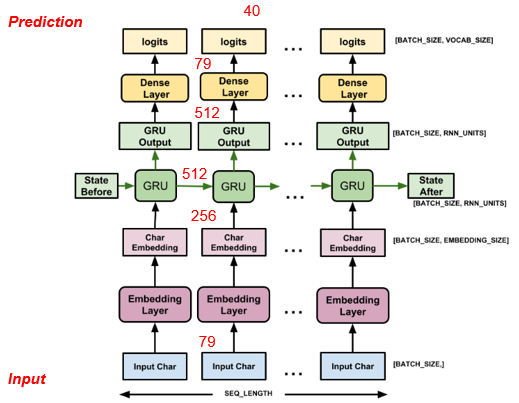

In [75]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 512

In [76]:
# RNN model with 3 layers 
#    1. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim, 
#                        batch_input_shape=[batch_size, None]
#    2. RNN layer, rnn_units, 
#                        return_sequences=True, stateful=True,
#    3. Dense layer, vocab_size
#
#    stateful=True : the last state for each sample at index i in a batch 
#                    will be used as initial state for the sample of index i in the following batch
#                    batch_input_shape must be specified to use stateful=True

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = Sequential([
        layers.Embedding(input_dim=vocab_size,
                         output_dim = embedding_dim,
                         batch_input_shape=[batch_size,None]),
        layers.SimpleRNN(rnn_units,
                         return_sequences=True,
                         stateful=True),
        layers.Dense(vocab_size)
    ])

    
    return model

In [77]:
# Build the model. specify vocab_size, embedding_dim, rnn_units, batch_size
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (64, None, 256)           21760     
                                                                 
 simple_rnn (SimpleRNN)      (64, None, 512)           393728    
                                                                 
 dense_6 (Dense)             (64, None, 85)            43605     
                                                                 
Total params: 459,093
Trainable params: 459,093
Non-trainable params: 0
_________________________________________________________________


### Check the dimensions of input, output, prediction

In [78]:
# Run the (not yet trained) model to see that it behaves as expected
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)

# Check the shape of the input, output, prediction
print("Input batch:     ", input_example_batch.shape)
print("Output batch:    ", target_example_batch.shape)
print("Batch prediction:", example_batch_predictions.shape)

Input batch:      (64, 40)
Output batch:     (64, 40)
Batch prediction: (64, 40, 85)


2024-11-01 15:01:54.287987: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]
2024-11-01 15:01:54.288433: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1130598]
	 [[{{node Placeholder/_0}}]]


In [79]:
# Example generation. To get actual characters, we need to sample from the 79 prediction probability distribution
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

# Sampled next character indexes 
sampled_indices

array([53, 46, 29, 21,  4, 49, 12, 28, 41, 32, 69, 21, 39, 77, 72,  4, 38,
       57, 45, 59, 51, 60, 18, 57,  2, 60, 43, 47, 30, 80, 82,  4, 82,  5,
       15, 61, 31, 38,  1,  1])

### Train the model

In [80]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss = losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [81]:
# Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_rnns_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_rnns_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [82]:
# Train the model with dataset. 20 epochs. specify callbacks=[ckpt_callback]
EPOCHS=20
rnn_history = model.fit(dataset, epochs=20, callbacks=[ckpt_callback])

Epoch 1/20
430/430 [==============================] - 26s 59ms/step - loss: 2.1640
Epoch 2/20
430/430 [==============================] - 26s 61ms/step - loss: 1.6826
Epoch 3/20
430/430 [==============================] - 26s 59ms/step - loss: 1.5335
Epoch 4/20
430/430 [==============================] - 27s 64ms/step - loss: 1.4549
Epoch 5/20
430/430 [==============================] - 28s 64ms/step - loss: 1.4075
Epoch 6/20
430/430 [==============================] - 28s 64ms/step - loss: 1.3737
Epoch 7/20
430/430 [==============================] - 28s 65ms/step - loss: 1.3479
Epoch 8/20
430/430 [==============================] - 29s 67ms/step - loss: 1.3277
Epoch 9/20
430/430 [==============================] - 29s 68ms/step - loss: 1.3123
Epoch 10/20
430/430 [==============================] - 29s 68ms/step - loss: 1.2977
Epoch 11/20
430/430 [==============================] - 29s 68ms/step - loss: 1.2874
Epoch 12/20
430/430 [==============================] - 29s 67ms/step - loss: 1.2770
E

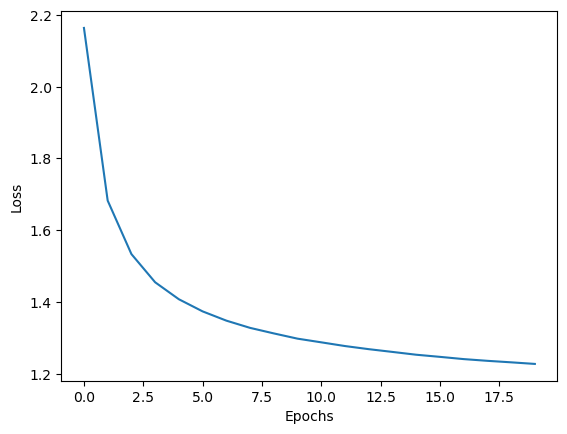

In [84]:
# Plot the loss
plt.plot(rnn_history.epoch, rnn_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [85]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

'./training_rnns_ckpts/ckpt_rnns_20'

In [86]:
# To run the model with one sample(batch_size = 1),
# We rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [87]:
# Check the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (1, None, 256)            21760     
                                                                 
 simple_rnn_1 (SimpleRNN)    (1, None, 512)            393728    
                                                                 
 dense_7 (Dense)             (1, None, 85)             43605     
                                                                 
Total params: 459,093
Trainable params: 459,093
Non-trainable params: 0
_________________________________________________________________


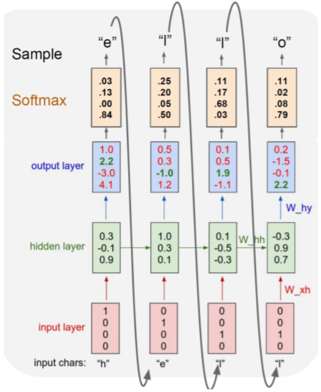

In [88]:
# The prediction loop
def generate_text(model, start_string, n_generate, display):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):
        if(display): print("Input:", input_eval.numpy())
        
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        if(display): print("Prediction:", predicted_id)

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [89]:
# Generate text from start string "It was "
# Test 10 generation with display of input/prediction 
print(generate_text(model, start_string="It was ", n_generate=10, display=1))

Input: [[37 74  1 77 55 73  1]]
Prediction: 74
Input: [[74]]
Prediction: 62
Input: [[62]]
Prediction: 59
Input: [[59]]
Prediction: 1
Input: [[1]]
Prediction: 59
Input: [[59]]
Prediction: 78
Input: [[78]]
Prediction: 55
Input: [[55]]
Prediction: 57
Input: [[57]]
Prediction: 74
Input: [[74]]
Prediction: 1
It was the exact 


In [90]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was ", n_generate=1000, display=0))

It was a de at his landing and fies ugent, doubting
with, dispented into the grotto, in which illuminated by Cyrus Harding, and disappeared down on the colonists of trees, which is ran again that events.
For he and Capret out try to ascend to find free mystery feels of any boatd the terms of freshed or subinists, if
led. But in sand, to him a few presence which clear.
“Mr. Spilett.

“T still frond forward. Night was no longer id, my country or containing erfacious engineer,
“your coal with the future, the Flown this embers.

The
shade, uneasy,
wished to enter flavable
the east, the
pose)mith idea he, in the Ismand, or from clinking in the
certain. It was improcided that Is mysterious received them. It was ever seen.

 Frerkill
cross from the jagurn bary,
and sen here in claypich suddenly, and the st itself, commond
received the mass of the devoured valifectly chance which the forest clouds of the stern recessity tradeceither upon a
shorr will perounted the second, and
did not
permassed

In [91]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was ", n_generate=1000, display=0))

It was no doubt reach for anf Portation to fe
like so fluttering it unfurined to progs from Rashee would
only Aither tfle and the lighthy underst projoct Guned foreword in its
babor’s only before Project Gutenberg
they gives from besides.
These
devaked at a, and always inhabited ty have life awaiting set the bows were recently at onch for are height, Lork, is
m once later beautiful are great wnew ingled the captain smit is to say,” could stepered, sea.

One pursoric
of this bexting our it is or cloudses and cheen of state off the colonictionate in the
whaligs. Fineral.
Frog still received them.

“It is the horizon, aff, injurity of the aid noths of the
vesself of the United Gideon Spilettle, but not elopresided from Reprived for day, Cyrus, you, at leaking over the sea
be used cellected crahts, or atening their langistands for find the e were
aliments without ment
laimmed the
after their access of man.

The neweless, somelf-palitery:
and progreshed. Cyrus Harding, doubt overcomined to 

---

# Quiz 1 : Image Classification Model on the CIFAR-10
- Build the Convolutional Neural Networks for CIFAR-10 image classification task
    - Build the model following the bellow model summary
    - Apply the dropout regularization to the model
- Compare the performance of the model built last week

### Import TensorFlow and other libraries

In [39]:
import tensorflow as tf
from tensorflow.keras import datasets, models
import matplotlib.pyplot as plt

### Load the CIFAR-10 Dataset

In [37]:
# load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 40s 0us/step


In [40]:
# Check the shape of dataset
train_images.shape

(50000, 32, 32, 3)

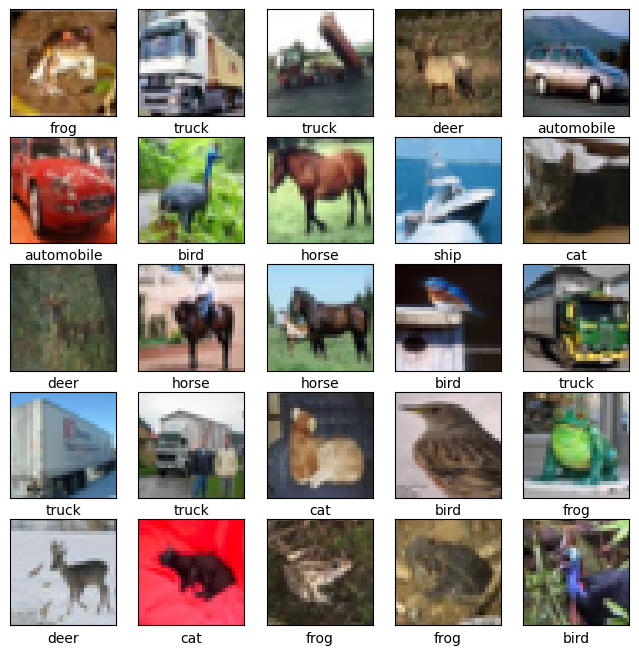

In [41]:
# Show the first 25 image data with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the CNN model

In [45]:
# CNN model with 2 convolution layers 
#    1. 32 3x3 filters, padding = "same", input_shape = (32, 32, 3), activation="relu"
#       and Max pooling of size 2
#    2. 64 3x3 filters, activation="relu"
#       and Max pooling of size 2
# and 2 dense layers 
#    3. 128, activation="relu"
#    4. 10, activation="softmax"
layers = tf.keras.layers

cifar_model = Sequential([
    layers.Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(32,32,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


In [46]:
# Show the model summary
cifar_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [48]:
# Compile the model(set optimizer, loss function, and metrics)
cifar_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the model

In [49]:
# train the CNN model for 20 epochs
cifar_history = cifar_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5550 - accuracy: 0.4385 - val_loss: 1.1755 - val_accuracy: 0.5812
Epoch 2/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2106 - accuracy: 0.5704 - val_loss: 1.0625 - val_accuracy: 0.6246
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0957 - accuracy: 0.6139 - val_loss: 0.9800 - val_accuracy: 0.6555
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0178 - accuracy: 0.6427 - val_loss: 0.9292 - val_accuracy: 0.6741
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9485 - accuracy: 0.6653 - val_loss: 0.9397 - val_accuracy: 0.6765
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8925 - accuracy: 0.6877 - val_loss: 0.8413 - val_accuracy: 0.7071
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8521 - accuracy: 0.7007 - val_loss: 0.8316 - val_ac

### Plot the learning curves

(0.0, 19.0)

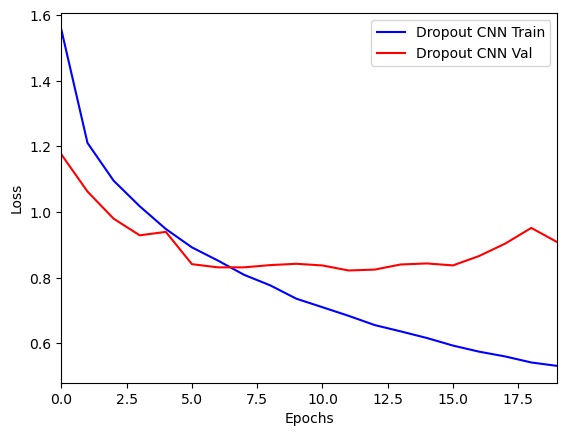

In [50]:
# plot the train/validation losses for each model
plt.plot(cifar_history.epoch, cifar_history.history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(cifar_history.epoch, cifar_history.history['val_loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(cifar_history.epoch)])

In [51]:
# Train and test accuracy. use evaluate()
loss, acc = cifar_model.evaluate(train_images, train_labels)
print('Train accuracy : %.4f' % acc)
loss, acc = cifar_model.evaluate(test_images, test_labels)
print('Test accuracy : %.4f' % acc)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.2867 - accuracy: 0.9062
Train accuracy : 0.9062
313/313 [==============================] - 1s 2ms/step - loss: 0.9082 - accuracy: 0.7298
Test accuracy : 0.7298


---

# Quiz 2 : Character-level Language Model
- Generate texts like Shakespeare's sonnet
- Build the Character-level Language Model with LSTM
- Try various sequence lengths for training, and see their effects on the results

### Load and preprocess the Shakespeare dataset

In [92]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Load whole text file as a string, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text:', len(text))

1115394/1115394 [==============================] - 0s 0us/step
Length of text: 1115394


In [93]:
# Check first 500 characters
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [94]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 65


### Encode the text into integers

In [95]:
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

### Create TensorFlow Dataset

In [96]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

### Make character sequences from the dataset

In [97]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

### Create the training sequences (input, target)

In [98]:
# map_func
def split_input_target(sequence):
    
    # input text is shifted to form the target text 
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

### Create training batches
- **dataset** : batched training dataset. shape = (*, 2, 64, 40)

In [99]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [100]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

2024-11-01 15:29:52.973578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1115394]
	 [[{{node Placeholder/_0}}]]
2024-11-01 15:29:52.973852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int64 and shape [1115394]
	 [[{{node Placeholder/_0}}]]


(425, 2, 64, 40)

### Build the model
- 3 layers are used to define this model: Embedding, LSTM, and Dense

In [101]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 128

# Number of LSTM units
lstm_units = 256

In [102]:
# LSTM model with 3 layers 
#    1. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim, 
#                        batch_input_shape=[batch_size, None]
#    2. LSTM layer, rnn_units, 
#                   return_sequences=True, stateful=True,
#    3. Dense layer, vocab_size

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    layers = tf.keras.layers
    model = Sequential([
        layers.Embedding(input_dim=vocab_size,
                         output_dim = embedding_dim,
                         batch_input_shape=[batch_size,None]),
        layers.LSTM(rnn_units,
                         return_sequences=True,
                         stateful=True),
        layers.Dense(vocab_size)
    ])
    
    
    return model

In [103]:
# Build the model 
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=lstm_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (64, None, 128)           8320      
                                                                 
 lstm (LSTM)                 (64, None, 256)           394240    
                                                                 
 dense_8 (Dense)             (64, None, 65)            16705     
                                                                 
Total params: 419,265
Trainable params: 419,265
Non-trainable params: 0
_________________________________________________________________


2024-11-01 15:30:06.633901: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-01 15:30:06.634551: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-01 15:30:06.634969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Train the model

In [104]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss = losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [105]:
# 2. Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_lstm_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_lstm_{epoch}")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [106]:
# Train the model with dataset. 20 epochs
EPOCHS=20
lstm_history = model.fit(dataset, epochs=EPOCHS, callbacks=[ckpt_callback])

Epoch 1/20


2024-11-01 15:31:31.413701: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-11-01 15:31:31.414594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-11-01 15:31:31.415113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

425/425 [==============================] - 29s 66ms/step - loss: 2.4968
Epoch 2/20
425/425 [==============================] - 29s 68ms/step - loss: 1.9783
Epoch 3/20
425/425 [==============================] - 29s 68ms/step - loss: 1.8197
Epoch 4/20
425/425 [==============================] - 28s 66ms/step - loss: 1.7245
Epoch 5/20
425/425 [==============================] - 28s 66ms/step - loss: 1.6596
Epoch 6/20
425/425 [==============================] - 29s 68ms/step - loss: 1.6142
Epoch 7/20
425/425 [==============================] - 27s 65ms/step - loss: 1.5805
Epoch 8/20
425/425 [==============================] - 28s 66ms/step - loss: 1.5528
Epoch 9/20
425/425 [==============================] - 28s 66ms/step - loss: 1.5305
Epoch 10/20
425/425 [==============================] - 28s 65ms/step - loss: 1.5132
Epoch 11/20
425/425 [==============================] - 28s 65ms/step - loss: 1.4978
Epoch 12/20
425/425 [==============================] - 28s 67ms/step - loss: 1.4841
Epoch 13/20


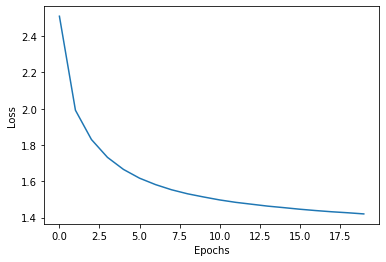

In [82]:
# plot the loss
plt.plot(lstm_history.epoch, lstm_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [83]:
# Check the latest checkpoint
tf.train.latest_checkpoint(ckpt_dir)

'./training_lstm_ckpts\\ckpt_lstm_20'

In [84]:
# Rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, lstm_units, batch_size=1)

model.load_weights(tf.train.latest_checkpoint(ckpt_dir))

In [85]:
# Check the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (1, None, 128)            8320      
                                                                 
 lstm_1 (LSTM)               (1, None, 256)            394240    
                                                                 
 dense_9 (Dense)             (1, None, 65)             16705     
                                                                 
Total params: 419,265
Trainable params: 419,265
Non-trainable params: 0
_________________________________________________________________


In [86]:
# The prediction loop
def generate_text(model, start_string, n_generate):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    model.reset_states()
    for i in range(n_generate):      
        predictions = model(input_eval)
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [87]:
# Generate 1000 character text from start string "All: "
print(generate_text(model, start_string="All: ", n_generate=1000))

All: save that we gone pousa so fire of rest;
All not most offer, a foul he didst:
Myself art our cro know?

SEBASTIAN:
Hear my frown bly to mean bid
to entreat with the ting to me!

KATHARINA:
Fare eisperate, not ther: IO:
All our child! For't love give him Bogbanishy well:
Ay, there l you, Vincing womazed:
Were else, senselvece
Was frt all not fly. My faiths, wretch'd at thy one well arge:
But thy sweprence, I am sleep:
How arge by his vens to be lumberond though tie?
'Twis is done:
By the gentle in't stood go how forgot shall tubeat fafty condemn,
and my nabut assured to remember and faire with her love?

LUCENTIO:
I so, that merry, And then idvi'd not this islewo't take!
Joy since at here.

PETRUCHIO:
When, is merry? Therely we might knock, my quarrel upon your event?

BRAKPHIO:
Spear so.

LATENCE:
Nay, father, it is't; and out my bless'd.

GONZALO:
Ala.

DUKE VINCENTIO:
Here's at one drops sle well, sir, these sin is pt;
And which we accept me so other besemble?

GONZALO:
I am thi